In [1]:
import pandas as pd 
import numpy as nb 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, classification_report, f1_score


In [2]:
data = pd.read_csv('H:\DATA\MY\practice\Practice-21\health_data.csv')
data = data.drop(columns=['Unnamed: 0','id'])

data['age'] = (data['age']/365).round()

data = data.astype(int)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62,110,80,0,0,0,0,1,0
1,55,0,156,85,140,90,2,0,0,0,1,1
2,52,0,165,64,130,70,2,0,0,0,0,1
3,48,1,169,82,150,100,0,0,0,0,1,1
4,48,0,156,56,100,60,0,0,0,0,0,0


In [3]:
print(Counter(data['cardio']))

Counter({0: 35021, 1: 34979})


In [4]:
model = RandomForestClassifier()

X = data.drop('cardio',axis = 1)
Y = data['cardio']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2 , random_state= 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
repport = classification_report(y_pred, y_test)

print('the accuracy Score : ', accuracy)
print('the model repport : ',repport)

the accuracy Score :  0.7047857142857142
the model repport :                precision    recall  f1-score   support

           0       0.71      0.70      0.71      7057
           1       0.70      0.71      0.70      6943

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



In [5]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 50, 150],  # Specify a range of values
#     'max_depth': [10, 15, 5],  # Include None to allow unlimited depth
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# grid_search.fit(x_train, y_train)
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(x_test)

# accuracy = accuracy_score(y_pred , y_test)
# print("Best Parameters:", grid_search.best_params_)
# print('the accuracy score : ',accuracy)

In [6]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('cardio',axis = 1)
Y = data['cardio']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2 , random_state= 42)


# Correctly fit the model with X_train (features) and y_train (target)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)

# Fit the model with the correct features and target
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7385
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



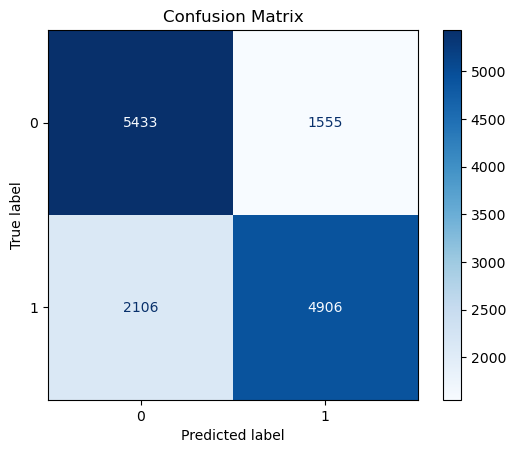

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


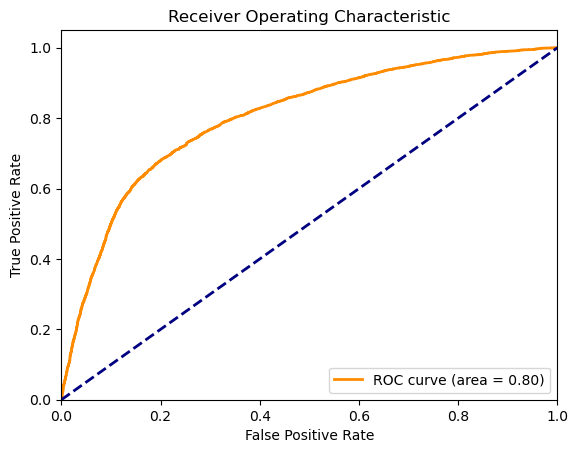

In [10]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = xgb_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
